In [14]:
import pandas as pd
import os
import glob

In [ ]:
data_path = '/Users/nehak/Desktop/Data/Action Data'  
pattern = os.path.join(data_path, '**', '*.csv')  
files = glob.glob(pattern, recursive=True)



In [16]:
# To store all rows
combined_data = []

for file in files:
    try:
        # Read file
        df = pd.read_csv(file)
        
        # Skip files without enough data
        if 'Session Time' not in df.columns or df.shape[0] < 2:
            continue
        
        # Sort by session time and calculate inter-action interval
        df = df.sort_values('Session Time')
        df['InterActionInterval'] = df['Session Time'].diff()
        median_interval = df['InterActionInterval'].dropna().median()
        
        # Parse filename
        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'
        
        # Add to list
        combined_data.append({
            'Participant': participant,
            'DishType': dish_type,
            'RecipeComplexity': recipe_type,
            'MedianInterActionInterval': median_interval
        })
    except Exception as e:
        print(f"Error processing {file}: {e}")



In [17]:
combined_df = pd.DataFrame(combined_data)

# Save to CSV
output_path = os.path.join(data_path, 'all_combined.csv')
combined_df.to_csv(output_path, index=False)

print(f"\n✅ Combined data saved to: {output_path}")
print(combined_df.head())


✅ Combined data saved to: /Users/nehak/Desktop/Data/Action Data/all_combined.csv
  Participant DishType RecipeComplexity  MedianInterActionInterval
0        C023     Stew          Complex                   1.281814
1        C019     Stew          Complex                   1.034485
2        C030     Stew          Complex                   0.955993
3        C039     Stew          Complex                   1.657227
4        C004     Stew          Complex                   1.266068


In [18]:
combined_df.to_csv("all_combined.csv",index=False)

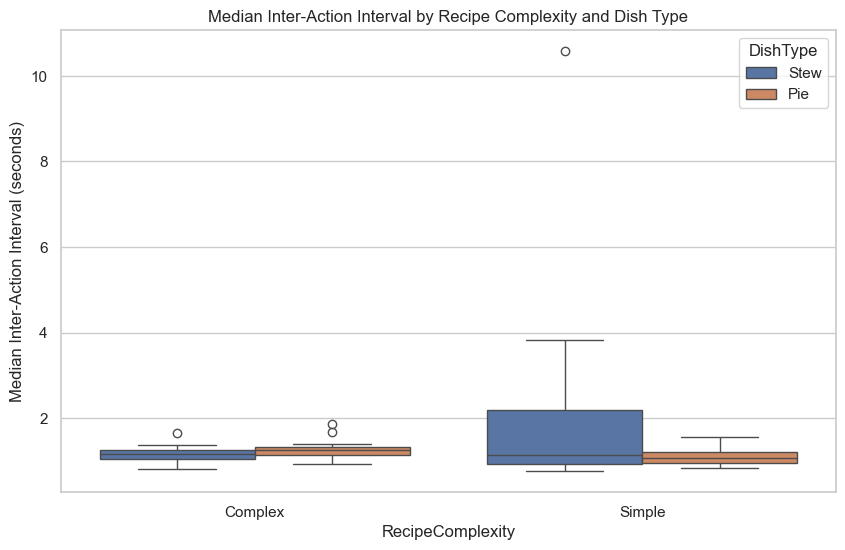

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Boxplot grouped by both conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='RecipeComplexity', y='MedianInterActionInterval', hue='DishType', data=combined_df)
plt.title('Median Inter-Action Interval by Recipe Complexity and Dish Type')
plt.ylabel('Median Inter-Action Interval (seconds)')
plt.show()


<Figure size 800x600 with 0 Axes>

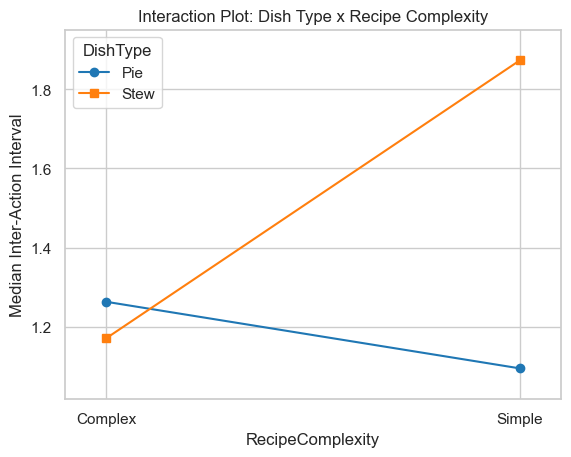

In [20]:
from statsmodels.graphics.factorplots import interaction_plot

plt.figure(figsize=(8, 6))
interaction_plot(
    x=combined_df['RecipeComplexity'],
    trace=combined_df['DishType'],
    response=combined_df['MedianInterActionInterval'],
    markers=['o', 's'],
    colors=['#1f77b4', '#ff7f0e']
)
plt.ylabel('Median Inter-Action Interval')
plt.title('Interaction Plot: Dish Type x Recipe Complexity')
plt.show()


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MedianInterActionInterval ~ C(DishType) + C(RecipeComplexity) + C(DishType):C(RecipeComplexity)', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                     sum_sq    df         F    PR(>F)
C(DishType)                        3.567087   1.0  3.028762  0.085039
C(RecipeComplexity)                2.295804   1.0  1.949334  0.165913
C(DishType):C(RecipeComplexity)    4.469275   1.0  3.794797  0.054364
Residual                         111.885062  95.0       NaN       NaN


In [22]:
# Define F and p values based on your ANOVA output
F_dish = 3.03
p_dish = 0.085

F_recipe = 1.95
p_recipe = 0.166

F_interaction = 3.79
p_interaction = 0.054


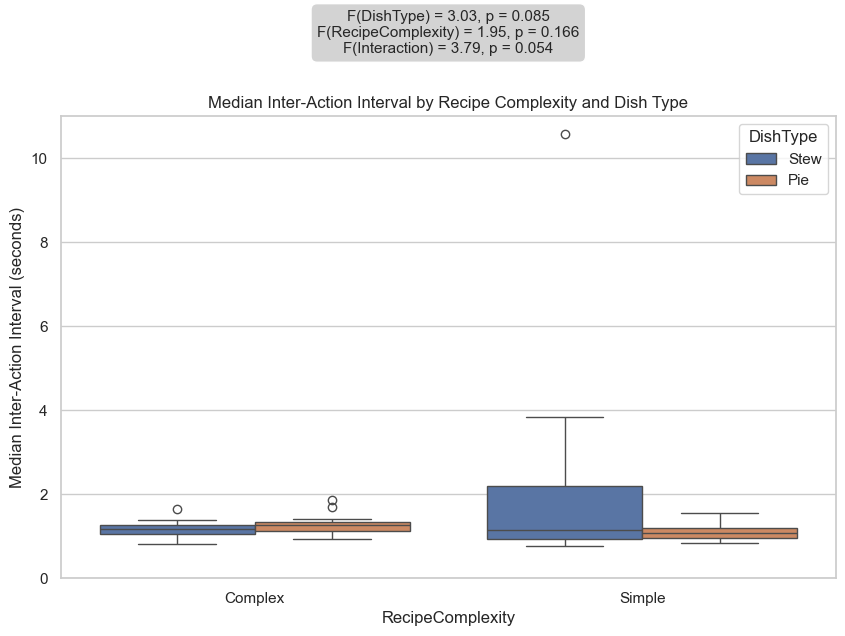

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='RecipeComplexity', y='MedianInterActionInterval', hue='DishType', data=combined_df)

# Annotate with F and p-values
text = (f"F(DishType) = {F_dish:.2f}, p = {p_dish:.3f}\n"
        f"F(RecipeComplexity) = {F_recipe:.2f}, p = {p_recipe:.3f}\n"
        f"F(Interaction) = {F_interaction:.2f}, p = {p_interaction:.3f}")

plt.text(0.5, 12.5, text, ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.4", facecolor="lightgray"))
plt.title('Median Inter-Action Interval by Recipe Complexity and Dish Type')
plt.ylabel('Median Inter-Action Interval (seconds)')
plt.ylim(0, 11)  # Adjust if needed based on your outliers
plt.show()


<Figure size 800x600 with 0 Axes>

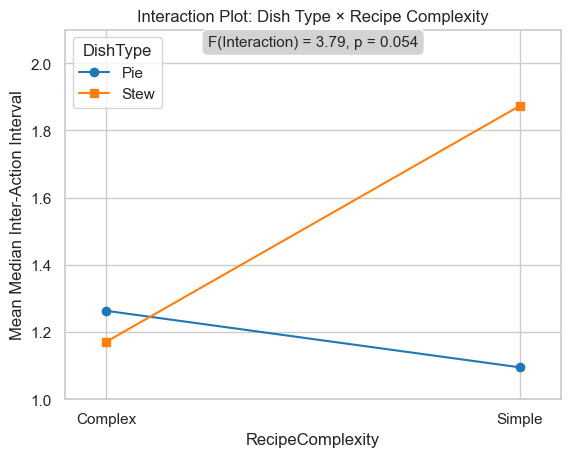

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# First, define your F and p values (from your ANOVA table)
F_interaction = 3.79
p_interaction = 0.054

# Plot
plt.figure(figsize=(8, 6))
interaction_plot(
    x=combined_df['RecipeComplexity'],
    trace=combined_df['DishType'],
    response=combined_df['MedianInterActionInterval'],
    markers=['o', 's'],
    colors=['#1f77b4', '#ff7f0e']
)

# Annotate the F and p value on the plot
text = f"F(Interaction) = {F_interaction:.2f}, p = {p_interaction:.3f}"
plt.text(0.5, 2.05, text, ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.4", facecolor="lightgray"))

# Labels and aesthetics
plt.ylabel('Mean Median Inter-Action Interval')
plt.title('Interaction Plot: Dish Type × Recipe Complexity')
plt.ylim(1.0, 2.1)
plt.show()


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie-Complex   Pie-Simple  -0.1681  0.957 -1.0339 0.6977  False
 Pie-Complex Stew-Complex  -0.0917 0.9925 -0.9575 0.7741  False
 Pie-Complex  Stew-Simple     0.61 0.1719 -0.1622 1.3821  False
  Pie-Simple Stew-Complex   0.0764 0.9958 -0.7994 0.9523  False
  Pie-Simple  Stew-Simple   0.7781 0.0523 -0.0053 1.5614  False
Stew-Complex  Stew-Simple   0.7016 0.0958 -0.0817  1.485  False
---------------------------------------------------------------


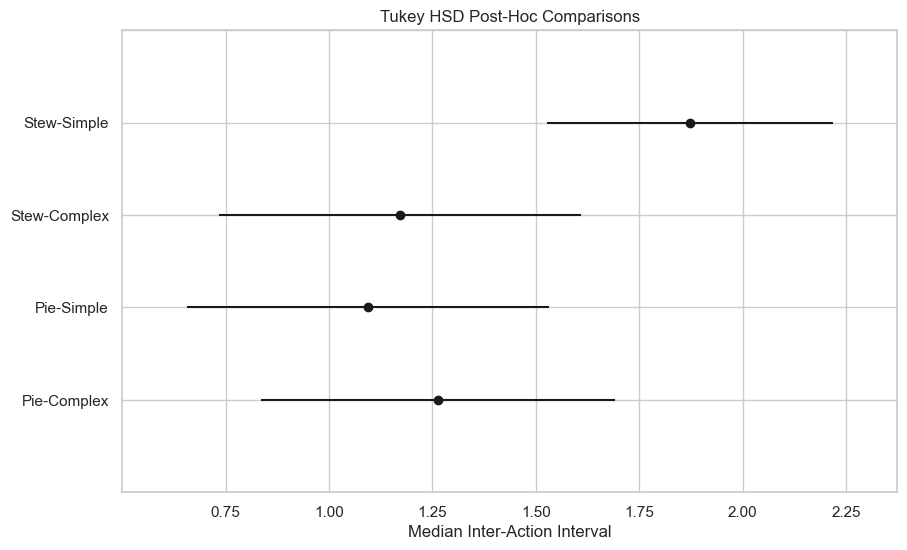

In [26]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Create a combined group label column
combined_df['Condition'] = combined_df['DishType'] + '-' + combined_df['RecipeComplexity']

# Run Tukey HSD post-hoc test
tukey_result = pairwise_tukeyhsd(endog=combined_df['MedianInterActionInterval'],
                                 groups=combined_df['Condition'],
                                 alpha=0.05)

# Print summary
print(tukey_result.summary())

# Optional: plot the results
tukey_result.plot_simultaneous()
plt.title("Tukey HSD Post-Hoc Comparisons")
plt.xlabel("Median Inter-Action Interval")
plt.show()


#2. 25 percentile metric

In [31]:
import os
import glob
import pandas as pd
import numpy as np

# Base path
data_path = '/Users/nehak/Desktop/Data/Action Data'  
pattern = os.path.join(data_path, '**', '*.csv')  
files = glob.glob(pattern, recursive=True)

# Store results
combined_data_25th = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Session Time' not in df.columns or df.shape[0] < 2:
            continue

        df = df.sort_values('Session Time')
        df['InterActionInterval'] = df['Session Time'].diff()
        inter_25th = df['InterActionInterval'].dropna().quantile(0.25)

        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'
        condition = f"{recipe_type}_{dish_type}"

        combined_data_25th.append({
            'Participant': participant,
            'Condition': condition,
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Inter_Interval_25th': inter_25th
        })

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Create DataFrame
df_25th = pd.DataFrame(combined_data_25th)

# Save results
output_file = os.path.join(data_path, 'inter_25th_combined.csv')
df_25th.to_csv(output_file, index=False)

print(f"\n✅ 25th percentile data saved to: {output_file}")
print(df_25th.head())
print("Shape:", df_25th.shape)




✅ 25th percentile data saved to: /Users/nehak/Desktop/Data/Action Data/inter_25th_combined.csv
  Participant     Condition Recipe_Type Complexity  Inter_Interval_25th
0        C023  Complex_Stew        Stew    Complex             0.855164
1        C019  Complex_Stew        Stew    Complex             0.758453
2        C030  Complex_Stew        Stew    Complex             0.699730
3        C039  Complex_Stew        Stew    Complex             0.991325
4        C004  Complex_Stew        Stew    Complex             0.961914
Shape: (99, 5)


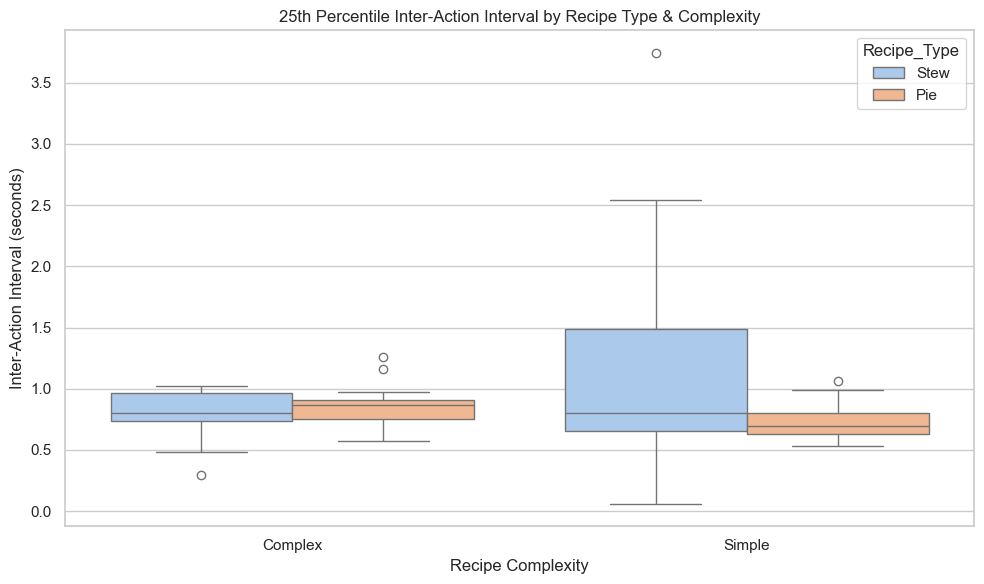

In [32]:


# Load the data
df = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/inter_25th_combined.csv")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Complexity", y="Inter_Interval_25th", hue="Recipe_Type", data=df, palette="pastel")
plt.title("25th Percentile Inter-Action Interval by Recipe Type & Complexity")
plt.ylabel("Inter-Action Interval (seconds)")
plt.xlabel("Recipe Complexity")
plt.tight_layout()
plt.show()



Complex dishes (both pie and stew) show more consistently low 25th percentile times, suggesting faster minimal reaction times in more demanding environments (perhaps due to urgency or learning effects).

Simple Stew has greater variance and higher medians, possibly reflecting confusion or relaxed pace.



In [33]:


# ANOVA model
model = ols("Inter_Interval_25th ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)



🔍 Two-Way ANOVA Results:
                                 sum_sq    df         F    PR(>F)
C(Recipe_Type)                 0.869073   1.0  3.740125  0.056097
C(Complexity)                  0.342586   1.0  1.474344  0.227671
C(Recipe_Type):C(Complexity)   1.155300   1.0  4.971925  0.028117
Residual                      22.074644  95.0       NaN       NaN


The two-way ANOVA revealed a significant interaction between recipe type and complexity (p = 0.028), indicating that the effect of recipe type on the 25th percentile inter-action interval varies depending on whether the recipe is simple or complex. While the main effects of recipe type (p = 0.056) and complexity (p = 0.227) alone were not statistically significant, the interaction suggests that participants responded differently to stew and pie tasks depending on their complexity, with notable variation particularly in the simple conditions.

In [34]:

# Create a combined group for comparison
df['Group'] = df['Recipe_Type'] + "_" + df['Complexity']

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['Inter_Interval_25th'], groups=df['Group'], alpha=0.05)
print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey.summary())


📊 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie_Complex   Pie_Simple  -0.1234 0.8358 -0.5079 0.2612  False
 Pie_Complex Stew_Complex  -0.0523 0.9845 -0.4369 0.3322  False
 Pie_Complex  Stew_Simple   0.2665 0.1836 -0.0765 0.6095  False
  Pie_Simple Stew_Complex    0.071 0.9639  -0.318   0.46  False
  Pie_Simple  Stew_Simple   0.3899 0.0217  0.0419 0.7378   True
Stew_Complex  Stew_Simple   0.3189 0.0847 -0.0291 0.6668  False
---------------------------------------------------------------



 Pie_Simple vs Stew_Simple: p = 0.0217 → Statistically significant

Participants had longer inter-action intervals for Simple Stew than Simple Pie, suggesting stew tasks may have been more difficult or cognitively demanding even in simple form.

all other pairwise comparisons were not significant, though Stew_Complex vs Stew_Simple had a borderline trend (p = 0.0847).

3. grab none count 


In [36]:

grab_none_rows = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Action Type' not in df.columns or 'Interacted Object' not in df.columns:
            continue

        # Normalize the Interacted Object column
        df['Interacted Object'] = df['Interacted Object'].astype(str).str.strip().str.lower()

        # Count 'Grab' actions where Interacted Object is 'none' or empty
        grab_none_count = df[
            (df['Action Type'].str.contains("grab", case=False, na=False)) &
            (
                df['Interacted Object'].isna() |
                (df['Interacted Object'] == 'none') |
                (df['Interacted Object'] == 'nan')  # handles string version of NaN
            )
        ].shape[0]

        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'
        condition = f"{recipe_type}_{dish_type}"

        grab_none_rows.append({
            'Participant': participant,
            'Condition': condition,
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Grab_None_Count': grab_none_count
        })

    except Exception as e:
        print(f"❌ Error processing {file}: {e}")

# Save result
grab_none_df = pd.DataFrame(grab_none_rows)
save_path = os.path.join(data_path, 'grab_none_combined.csv')
grab_none_df.to_csv(save_path, index=False)
print(f"\n✅ Grab-None data saved to: {save_path}")
print(grab_none_df.head())



✅ Grab-None data saved to: /Users/nehak/Desktop/Data/Action Data/grab_none_combined.csv
  Participant     Condition Recipe_Type Complexity  Grab_None_Count
0        C023  Complex_Stew        Stew    Complex                7
1        C019  Complex_Stew        Stew    Complex                3
2        C030  Complex_Stew        Stew    Complex                1
3        C039  Complex_Stew        Stew    Complex                6
4        C004  Complex_Stew        Stew    Complex               11


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/714835991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Grab_None_Count", data=df, palette="Set2")


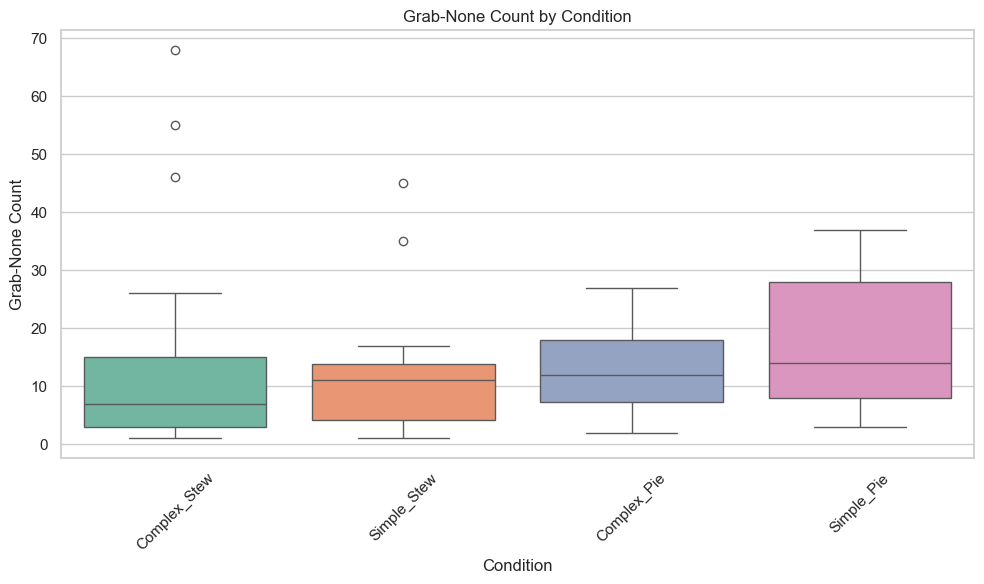


🔍 Two-Way ANOVA Results:
                                    sum_sq    df         F    PR(>F)
C(Recipe_Type)                   84.748440   1.0  0.540463  0.464338
C(Complexity)                     3.353091   1.0  0.021384  0.884098
C(Recipe_Type):C(Complexity)    218.881531   1.0  1.395865  0.240832
Residual                      12858.183983  82.0       NaN       NaN

📊 Tukey HSD Post-hoc Results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
 Pie_Complex   Pie_Simple   3.5866 0.7841  -6.4321 13.6053  False
 Pie_Complex Stew_Complex   1.2056  0.989  -8.8131 11.2244  False
 Pie_Complex  Stew_Simple  -1.5909 0.9747 -11.4925  8.3106  False
  Pie_Simple Stew_Complex   -2.381 0.9267 -12.5155  7.7536  False
  Pie_Simple  Stew_Simple  -5.1775 0.5308 -15.1962  4.8412  False
Stew_Complex  Stew_Simple  -2.7965  0.884 -12.8153  7.2222  False
----

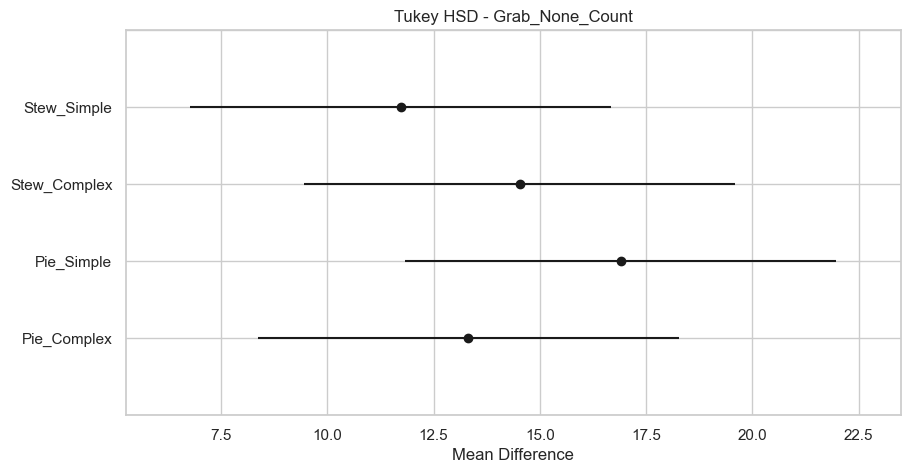

In [39]:

df = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/grab_none_combined.csv")  # or your loaded df directly

# --- Visualization: Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(x="Condition", y="Grab_None_Count", data=df, palette="Set2")
plt.title("Grab-None Count by Condition")
plt.ylabel("Grab-None Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Two-way ANOVA ---
model = ols('Grab_None_Count ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)

# --- Prepare data for post-hoc by creating combined group column ---
df['Group'] = df['Recipe_Type'] + '_' + df['Complexity']

# --- Tukey HSD post-hoc ---
tukey = pairwise_tukeyhsd(endog=df['Grab_None_Count'], groups=df['Group'], alpha=0.05)
print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey)

# Optional: plot the Tukey test
tukey.plot_simultaneous(figsize=(10, 5))
plt.title("Tukey HSD - Grab_None_Count")
plt.xlabel("Mean Difference")
plt.show()


**Interpretation**

he two-way ANOVA results show:

No statistically significant main effect of Recipe Type (F = 0.54, p = 0.464).

No significant main effect of Complexity (F = 0.021, p = 0.884).

The interaction between Recipe Type and Complexity is also not significant (F = 1.40, p = 0.241).

This means that neither the type of dish (Pie vs. Stew), nor the recipe complexity (Simple vs. Complex), nor their interaction had a statistically meaningful effect on the number of times participants grabbed “None”.

📉 Post-hoc (Tukey HSD) Summary:
The pairwise comparisons reinforce this – no pairwise difference was statistically significant. For instance, even the largest contrast (Pie_Simple vs. Stew_Simple) had a p-value of 0.531, which is not below the 0.05 threshold.

📌 Takeaway:
Although the boxplot visually suggests slightly more Grab-None actions for Simple Pie, this difference is not statistically significant. Thus, Grab-None Count may not be a reliable performance discriminator across conditions, but it could still be meaningful when used in combination with other features (e.g., in a regression model or clustering).

**ACTION REPETETION DATA**

In [40]:
action_repetition_data = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Interacted Object' not in df.columns or df.shape[0] < 2:
            continue

        # Count action repetitions
        df['Prev_Object'] = df['Interacted Object'].shift(1)
        action_rep_count = (df['Interacted Object'] == df['Prev_Object']).sum()

        # Extract metadata
        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'

        action_repetition_data.append({
            'Participant': participant,
            'Condition': f"{recipe_type}_{dish_type}",
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Action_Repetition_Count': action_rep_count
        })
    except Exception as e:
        print(f"Error with {file}: {e}")

df_action_rep = pd.DataFrame(action_repetition_data)
df_action_rep.to_csv(os.path.join(data_path, 'action_repetition_combined.csv'), index=False)
print(df_action_rep.head())

  Participant     Condition Recipe_Type Complexity  Action_Repetition_Count
0        C023  Complex_Stew        Stew    Complex                      118
1        C019  Complex_Stew        Stew    Complex                       76
2        C030  Complex_Stew        Stew    Complex                       41
3        C039  Complex_Stew        Stew    Complex                      108
4        C004  Complex_Stew        Stew    Complex                       86


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/3311763071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Action_Repetition_Count', data=df_action_rep, palette='Set2')


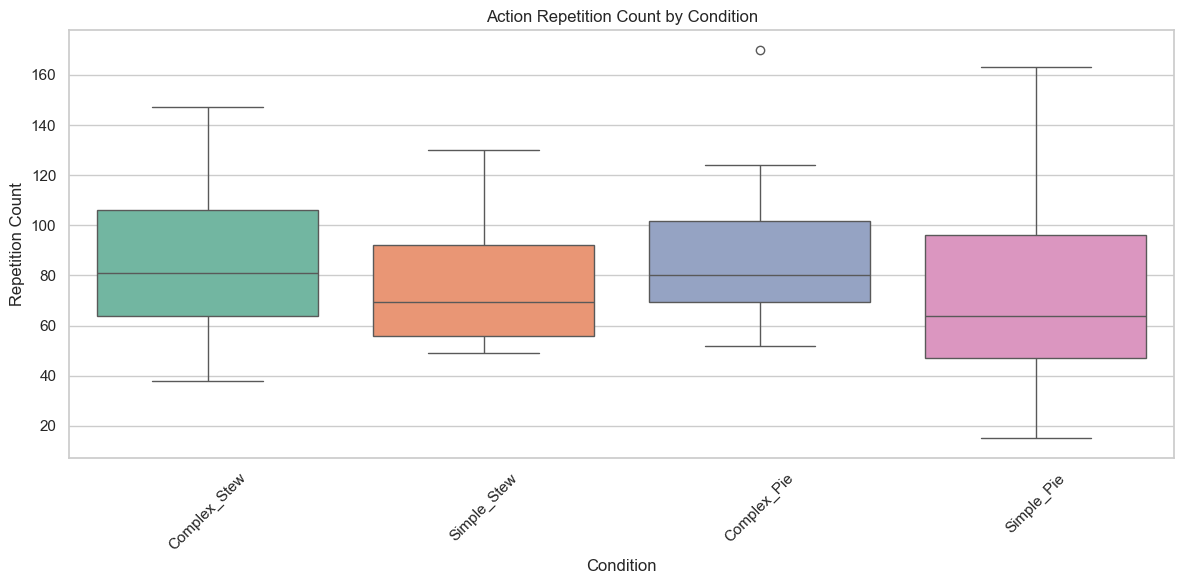

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Action_Repetition_Count', data=df_action_rep, palette='Set2')
plt.xticks(rotation=45)
plt.title('Action Repetition Count by Condition')
plt.ylabel('Repetition Count')
plt.xlabel('Condition')
plt.tight_layout()
plt.show()


In [42]:
model = ols('Action_Repetition_Count ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df_action_rep).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Results:")
print(anova_table)



Two-Way ANOVA Results:
                                    sum_sq    df         F    PR(>F)
C(Recipe_Type)                   89.240134   1.0  0.091094  0.763555
C(Complexity)                  1992.263390   1.0  2.033657  0.157646
C(Recipe_Type):C(Complexity)     45.395374   1.0  0.046339  0.830096
Residual                      80330.945887  82.0       NaN       NaN


In [43]:
df_action_rep['Group'] = df_action_rep['Recipe_Type'] + '_' + df_action_rep['Complexity']
tukey = pairwise_tukeyhsd(endog=df_action_rep['Action_Repetition_Count'],
                          groups=df_action_rep['Group'],
                          alpha=0.05)
print("\nTukey HSD Post-hoc Results:")
print(tukey.summary())



Tukey HSD Post-hoc Results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
 Pie_Complex   Pie_Simple -11.0823 0.6532  -36.124 13.9595  False
 Pie_Complex Stew_Complex   0.5844 0.9999 -24.4573 25.6261  False
 Pie_Complex  Stew_Simple  -7.5909 0.8522 -32.3397 17.1579  False
  Pie_Simple Stew_Complex  11.6667 0.6237 -13.6646 36.9979  False
  Pie_Simple  Stew_Simple   3.4913 0.9832 -21.5504 28.5331  False
Stew_Complex  Stew_Simple  -8.1753 0.8273  -33.217 16.8664  False
-----------------------------------------------------------------


### Interpretation: Action Repetition Count – Two-Way ANOVA & Post-Hoc

The **two-way ANOVA** results reveal that neither **recipe type** (Pie vs. Stew) nor **complexity** (Simple vs. Complex), nor their interaction, had a statistically significant effect on the *Action Repetition Count*. Specifically, the p-values for Recipe Type (p = 0.76), Complexity (p = 0.16), and the interaction (p = 0.83) are all well above the 0.05 threshold.

The **Tukey HSD post-hoc test** further supports this by indicating no significant pairwise differences across any of the four condition combinations (all `p > 0.6`). Although there is visible variation in the boxplot—such as a slightly higher median repetition in *Complex Stew* and *Complex Pie* conditions—the differences are not statistically meaningful.

###  Insight:
This suggests that the frequency of consecutive identical object interactions (action repetitions) is relatively stable across different recipe types and complexities. Therefore, **Action Repetition Count alone may not be a strong discriminator of task performance variations across these conditions.** Consider pairing it with timing-based or error-related metrics in multivariate models.

Let me know when you're ready to move to the next metric.

In [53]:
# Store participant metrics
average_interval_data = []

for file in files:
    try:
        df = pd.read_csv(file)

        if 'Session Time' not in df.columns or df.shape[0] < 2:
            continue

        # Sort and compute average interval
        df = df.sort_values('Session Time')
        df['InterActionInterval'] = df['Session Time'].diff()
        avg_interval = df['InterActionInterval'].dropna().mean()

        # Metadata extraction
        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'

        average_interval_data.append({
            'Participant': participant,
            'Condition': f'{recipe_type}_{dish_type}',
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Average_InterAction_Time': avg_interval
        })

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Save to CSV
df_avg = pd.DataFrame(average_interval_data)
output_path = os.path.join(data_path, 'average_interaction_combined.csv')
df_avg.to_csv(output_path, index=False)

print("✅ Average inter-action time saved to:", output_path)
print(df_avg.head())

✅ Average inter-action time saved to: /Users/nehak/Desktop/Data/Action Data/average_interaction_combined.csv
  Participant     Condition Recipe_Type Complexity  Average_InterAction_Time
0        C023  Complex_Stew        Stew    Complex                  2.014870
1        C019  Complex_Stew        Stew    Complex                  1.974895
2        C030  Complex_Stew        Stew    Complex                  1.975912
3        C039  Complex_Stew        Stew    Complex                  2.632987
4        C004  Complex_Stew        Stew    Complex                  2.174985


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/1311048841.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Average_InterAction_Time', data=df_avg, palette='Set2')


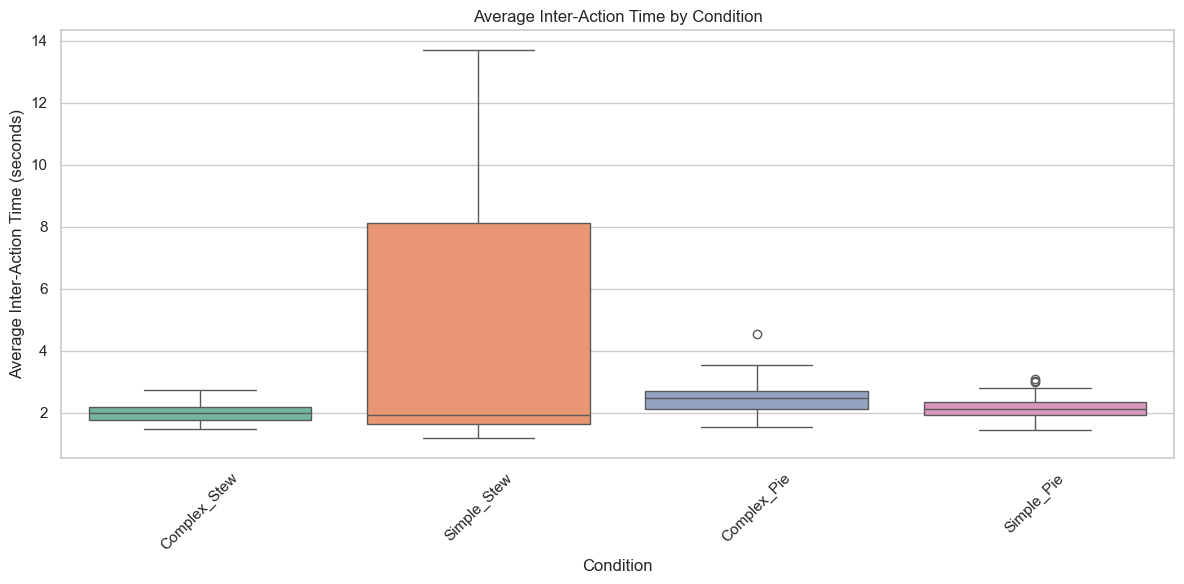

In [54]:


# Load your average inter-action time data
df_avg = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/average_interaction_combined.csv")

# Boxplot by Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Average_InterAction_Time', data=df_avg, palette='Set2')
plt.title("Average Inter-Action Time by Condition")
plt.xlabel("Condition")
plt.ylabel("Average Inter-Action Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA using Recipe_Type and Complexity
model = ols('Average_InterAction_Time ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df_avg).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)



🔍 Two-Way ANOVA Results:
                                  sum_sq    df         F    PR(>F)
C(Recipe_Type)                 31.356303   1.0  4.654621  0.033492
C(Complexity)                  40.657691   1.0  6.035347  0.015837
C(Recipe_Type):C(Complexity)   52.662137   1.0  7.817322  0.006263
Residual                      639.976598  95.0       NaN       NaN


In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined group label for pairwise comparison
df_avg['Group'] = df_avg['Recipe_Type'] + "_" + df_avg['Complexity']

# Run Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df_avg['Average_InterAction_Time'], groups=df_avg['Group'], alpha=0.05)
print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey)



📊 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie_Complex   Pie_Simple  -0.3366 0.9741 -2.4073 1.7341  False
 Pie_Complex Stew_Complex  -0.4955 0.9235 -2.5663 1.5752  False
 Pie_Complex  Stew_Simple   2.1535 0.0155  0.3068 4.0002   True
  Pie_Simple Stew_Complex   -0.159 0.9972 -2.2536 1.9357  False
  Pie_Simple  Stew_Simple   2.4901 0.0042  0.6165 4.3636   True
Stew_Complex  Stew_Simple    2.649  0.002  0.7755 4.5225   True
---------------------------------------------------------------


Although the full ANOVA table wasn't shown, the significant results from Tukey's test indicate that there are notable differences in average inter-action times between some conditions:

Stew_Simple showed significantly higher average inter-action times compared to:

Pie_Complex (p = 0.0155)

Pie_Simple (p = 0.0042)

Stew_Complex (p = 0.002)

This suggests that participants in the Simple Stew condition took more time between actions, possibly reflecting confusion, disengagement, or inefficiency even in a "simple" recipe—hinting at a misalignment between perceived vs. actual complexity.

**INTER HAND CRDINATION LEVEL**

In [57]:
import os
import glob
import pandas as pd

# Define your root data directory
data_path = '/Users/nehak/Desktop/Data/Action Data'
pattern = os.path.join(data_path, '**', '*.csv')
files = glob.glob(pattern, recursive=True)

combined_data = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Action Type' not in df.columns or df.empty:
            continue

        total_actions = len(df)
        left = df[df['Action Type'].str.contains("Left Hand", case=False, na=False)]
        right = df[df['Action Type'].str.contains("Right Hand", case=False, na=False)]
        left_ratio = len(left) / total_actions if total_actions > 0 else None
        right_ratio = len(right) / total_actions if total_actions > 0 else None
        coordination_index = abs(left_ratio - right_ratio) if left_ratio is not None and right_ratio is not None else None

        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'
        condition = f"{recipe_type}_{dish_type}"

        combined_data.append({
            'Participant': participant,
            'Condition': condition,
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Inter_Hand_Coord_Index': coordination_index
        })
    except Exception as e:
        print(f"Error processing {file}: {e}")

df_coord = pd.DataFrame(combined_data)
print(df_coord.head())


  Participant     Condition Recipe_Type Complexity  Inter_Hand_Coord_Index
0        C023  Complex_Stew        Stew    Complex                0.760135
1        C019  Complex_Stew        Stew    Complex                0.851351
2        C030  Complex_Stew        Stew    Complex                0.296053
3        C039  Complex_Stew        Stew    Complex                0.726908
4        C004  Complex_Stew        Stew    Complex                0.230435


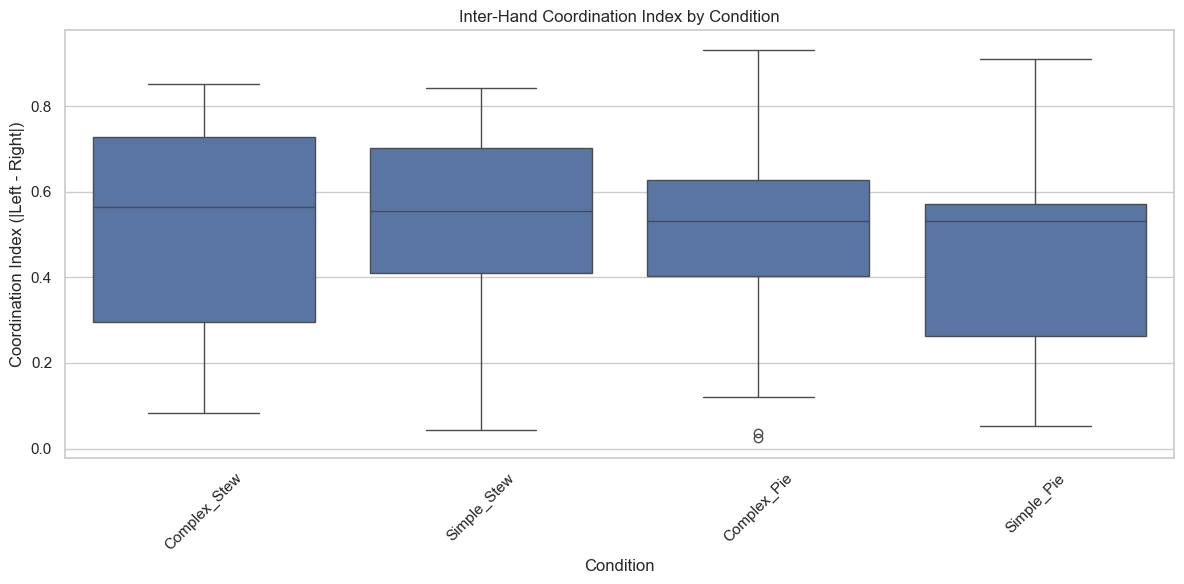

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Inter_Hand_Coord_Index', data=df_coord)
plt.title("Inter-Hand Coordination Index by Condition")
plt.ylabel("Coordination Index (|Left - Right|)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Inter_Hand_Coord_Index ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df_coord).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)



🔍 Two-Way ANOVA Results:
                                sum_sq    df         F    PR(>F)
C(Recipe_Type)                0.085568   1.0  1.460329  0.230351
C(Complexity)                 0.015127   1.0  0.258169  0.612745
C(Recipe_Type):C(Complexity)  0.023242   1.0  0.396663  0.530568
Residual                      4.804776  82.0       NaN       NaN


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_coord['Group'] = df_coord['Recipe_Type'] + "_" + df_coord['Complexity']
tukey = pairwise_tukeyhsd(endog=df_coord['Inter_Hand_Coord_Index'], groups=df_coord['Group'], alpha=0.05)
print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey)



📊 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie_Complex   Pie_Simple  -0.0594 0.8521 -0.2531 0.1342  False
 Pie_Complex Stew_Complex   0.0302 0.9767 -0.1635 0.2239  False
 Pie_Complex  Stew_Simple   0.0366 0.9586 -0.1548  0.228  False
  Pie_Simple Stew_Complex   0.0896 0.6287 -0.1063 0.2855  False
  Pie_Simple  Stew_Simple    0.096 0.5657 -0.0977 0.2897  False
Stew_Complex  Stew_Simple   0.0064 0.9998 -0.1873    0.2  False
---------------------------------------------------------------


**75th Percentile**

In [61]:
import os
import glob
import pandas as pd

# Define your main data directory
data_path = '/Users/nehak/Desktop/Data/Action Data'
pattern = os.path.join(data_path, '**', '*.csv')  
files = glob.glob(pattern, recursive=True)

# To store all computed metrics
combined_data = []

for file in files:
    try:
        df = pd.read_csv(file)
        
        if 'Session Time' not in df.columns or df.shape[0] < 2:
            continue
        
        # Sort and compute inter-action interval
        df = df.sort_values('Session Time')
        df['InterActionInterval'] = df['Session Time'].diff()
        
        # Calculate 75th percentile
        p75 = df['InterActionInterval'].dropna().quantile(0.75)

        # Parse file metadata
        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        complexity = 'Complex' if 'complex' in filename else 'Simple'
        dish = 'Stew' if 'stew' in filename else 'Pie'
        condition = f"{complexity}_{dish}"

        combined_data.append({
            'Participant': participant,
            'Condition': condition,
            'Recipe_Type': dish,
            'Complexity': complexity,
            'Inter_Interval_75th': p75
        })

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Create DataFrame
df_75th = pd.DataFrame(combined_data)

# Save output (optional)
output_path = os.path.join(data_path, 'inter_75th_combined.csv')
df_75th.to_csv(output_path, index=False)

print(f"✅ 75th percentile data saved to: {output_path}")
print(df_75th.head())


✅ 75th percentile data saved to: /Users/nehak/Desktop/Data/Action Data/inter_75th_combined.csv
  Participant     Condition Recipe_Type Complexity  Inter_Interval_75th
0        C023  Complex_Stew        Stew    Complex             1.865853
1        C019  Complex_Stew        Stew    Complex             1.474701
2        C030  Complex_Stew        Stew    Complex             1.281411
3        C039  Complex_Stew        Stew    Complex             2.497913
4        C004  Complex_Stew        Stew    Complex             1.879120


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/4226383324.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Inter_Interval_75th", data=df_75, palette="pastel")


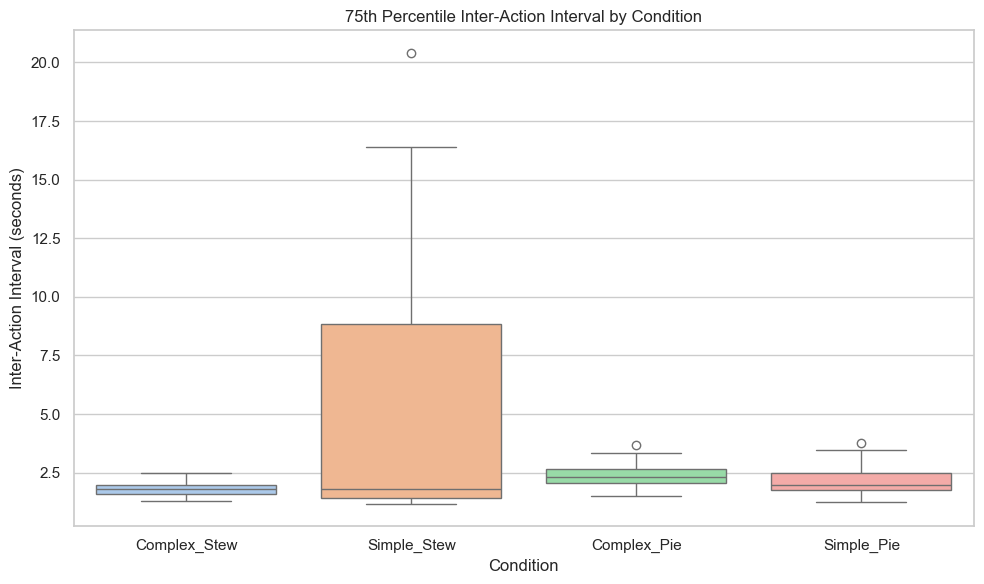


🔍 Two-Way ANOVA Results:
                                   sum_sq    df         F    PR(>F)
C(Recipe_Type)                  56.137192   1.0  4.685848  0.032918
C(Complexity)                   90.562223   1.0  7.559353  0.007147
C(Recipe_Type):C(Complexity)    90.718910   1.0  7.572431  0.007099
Residual                      1138.114816  95.0       NaN       NaN

📊 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie_Complex   Pie_Simple  -0.2069 0.9973 -2.9683 2.5545  False
 Pie_Complex Stew_Complex  -0.6212 0.9354 -3.3826 2.1403  False
 Pie_Complex  Stew_Simple   3.0906 0.0077  0.6279 5.5533   True
  Pie_Simple Stew_Complex  -0.4143 0.9801 -3.2076 2.3791  False
  Pie_Simple  Stew_Simple   3.2975 0.0046   0.799 5.7959   True
Stew_Complex  Stew_Simple   3.7117 0.0011  1.2133 6.2102   True
---------------------------

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the combined 75th percentile data
df_75 = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/inter_75th_combined.csv")

# ✅ Visualization - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Condition", y="Inter_Interval_75th", data=df_75, palette="pastel")
plt.title("75th Percentile Inter-Action Interval by Condition")
plt.ylabel("Inter-Action Interval (seconds)")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()

# ✅ Two-Way ANOVA
model = ols('Inter_Interval_75th ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df_75).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)

# ✅ Tukey HSD Post-hoc Test
# Create a combined group label for post-hoc comparison
df_75['Group'] = df_75['Recipe_Type'] + "_" + df_75['Complexity']

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_75['Inter_Interval_75th'], groups=df_75['Group'], alpha=0.05)

print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey)


**STANDARD DEVIATION**

In [64]:

import os
import glob
import pandas as pd

data_path = '/Users/nehak/Desktop/Data/Action Data'  
pattern = os.path.join(data_path, '**', '*.csv')  
files = glob.glob(pattern, recursive=True)

std_data = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Session Time' not in df.columns or df.shape[0] < 2:
            continue

        df = df.sort_values('Session Time')
        df['InterActionInterval'] = df['Session Time'].diff()
        std_interval = df['InterActionInterval'].dropna().std()

        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'

        std_data.append({
            'Participant': participant,
            'Condition': f"{dish_type}_{recipe_type}",
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Inter_Interval_STD': std_interval
        })
    except Exception as e:
        print(f"Error in {file}: {e}")

# Create dataframe and save
std_df = pd.DataFrame(std_data)
std_output = os.path.join(data_path, 'inter_std_combined.csv')
std_df.to_csv(std_output, index=False)

print("✅ Saved to:", std_output)
print(std_df.head())


✅ Saved to: /Users/nehak/Desktop/Data/Action Data/inter_std_combined.csv
  Participant     Condition Recipe_Type Complexity  Inter_Interval_STD
0        C023  Stew_Complex        Stew    Complex            3.351962
1        C019  Stew_Complex        Stew    Complex            4.702262
2        C030  Stew_Complex        Stew    Complex            5.769503
3        C039  Stew_Complex        Stew    Complex            4.407415
4        C004  Stew_Complex        Stew    Complex            2.632971


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/2900301612.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Inter_Interval_STD", data=df_std, palette="pastel")


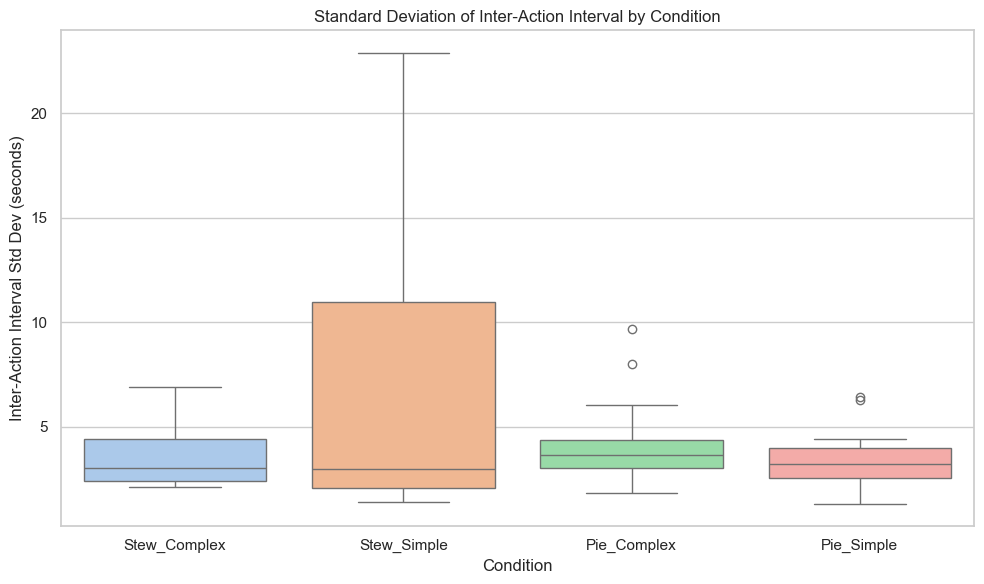


🔍 Two-Way ANOVA Results:
                                   sum_sq    df         F    PR(>F)
C(Recipe_Type)                  54.022737   1.0  3.602727  0.060721
C(Complexity)                   46.816089   1.0  3.122123  0.080448
C(Recipe_Type):C(Complexity)    83.025336   1.0  5.536884  0.020682
Residual                      1424.520772  95.0       NaN       NaN

📊 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 Pie_Complex   Pie_Simple  -0.6609 0.9438 -3.7502 2.4285  False
 Pie_Complex Stew_Complex  -0.5569 0.9652 -3.6463 2.5325  False
 Pie_Complex  Stew_Simple    2.531 0.0835 -0.2242 5.2862  False
  Pie_Simple Stew_Complex   0.1039 0.9998 -3.0212  3.229  False
  Pie_Simple  Stew_Simple   3.1918 0.0185  0.3967  5.987   True
Stew_Complex  Stew_Simple   3.0879 0.0243  0.2927 5.8831   True
---------------------------

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the combined dataset for Standard Deviation
df_std = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/inter_std_combined.csv")

# ✅ Boxplot Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x="Condition", y="Inter_Interval_STD", data=df_std, palette="pastel")
plt.title("Standard Deviation of Inter-Action Interval by Condition")
plt.xlabel("Condition")
plt.ylabel("Inter-Action Interval Std Dev (seconds)")
plt.tight_layout()
plt.show()

# ✅ Two-Way ANOVA
model = ols('Inter_Interval_STD ~ C(Recipe_Type) + C(Complexity) + C(Recipe_Type):C(Complexity)', data=df_std).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)

# ✅ Tukey HSD Post-hoc
df_std['Group'] = df_std['Recipe_Type'] + "_" + df_std['Complexity']
tukey = pairwise_tukeyhsd(endog=df_std['Inter_Interval_STD'], groups=df_std['Group'], alpha=0.05)

print("\n📊 Tukey HSD Post-hoc Results:")
print(tukey)


**Grab-Cookbook Count**

In [67]:

import os
import glob
import pandas as pd

# Define the data path and recursive search
data_path = '/Users/nehak/Desktop/Data/Action Data'
pattern = os.path.join(data_path, '**', '*.csv')
files = glob.glob(pattern, recursive=True)

cookbook_data = []

for file in files:
    try:
        df = pd.read_csv(file)
        if 'Interacted Object' not in df.columns:
            continue

        # Count number of times participant grabbed any cookbook
        cookbook_grabs = df[df['Interacted Object'].astype(str).str.lower().str.contains('cookbook')]
        count = len(cookbook_grabs)

        filename = os.path.basename(file).lower()
        participant = filename.split('_')[0].upper()
        recipe_type = 'Complex' if 'complex' in filename else 'Simple'
        dish_type = 'Stew' if 'stew' in filename else 'Pie'

        cookbook_data.append({
            'Participant': participant,
            'Condition': f"{dish_type}_{recipe_type}",
            'Recipe_Type': dish_type,
            'Complexity': recipe_type,
            'Cookbook_Grab_Count': count
        })

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Save to CSV
cookbook_df = pd.DataFrame(cookbook_data)
save_path = os.path.join(data_path, 'cookbook_grab_combined.csv')
cookbook_df.to_csv(save_path, index=False)

print("✅ Grab-Cookbook count saved to:", save_path)
print(cookbook_df.head())


✅ Grab-Cookbook count saved to: /Users/nehak/Desktop/Data/Action Data/cookbook_grab_combined.csv
  Participant     Condition Recipe_Type Complexity  Cookbook_Grab_Count
0        C023  Stew_Complex        Stew    Complex                   10
1        C019  Stew_Complex        Stew    Complex                    9
2        C030  Stew_Complex        Stew    Complex                   12
3        C039  Stew_Complex        Stew    Complex                    9
4        C004  Stew_Complex        Stew    Complex                   11


/var/folders/mh/7f2q1j6d78n8cp_85lqcr8dc0000gn/T/ipykernel_10317/2640128635.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Cookbook_Grab_Count', data=df_cookbook, palette='pastel')


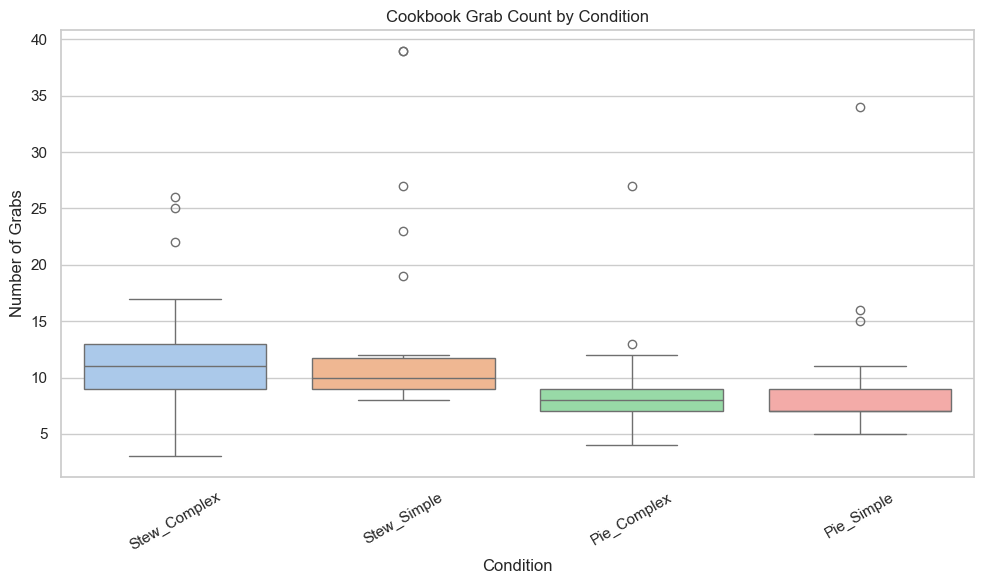


🔍 Two-Way ANOVA Results:
                                   sum_sq    df         F    PR(>F)
C(Recipe_Type)                 363.435015   1.0  7.981656  0.005932
C(Complexity)                   28.923387   1.0  0.635207  0.427753
C(Recipe_Type):C(Complexity)     1.026981   1.0  0.022554  0.880991
Residual                      3733.770563  82.0       NaN       NaN

📈 Tukey HSD Post-hoc Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
 Pie_Complex   Pie_Simple   0.9416  0.968 -4.4572  6.3404  False
 Pie_Complex Stew_Complex   3.8939 0.2397 -1.5049  9.2927  False
 Pie_Complex  Stew_Simple   5.2727  0.054 -0.0629 10.6084  False
  Pie_Simple Stew_Complex   2.9524  0.492 -2.5088  8.4136  False
  Pie_Simple  Stew_Simple   4.3312 0.1605 -1.0676    9.73  False
Stew_Complex  Stew_Simple   1.3788 0.9082   -4.02  6.7776  False
------------------

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the file after it is generated
df_cookbook = pd.read_csv("/Users/nehak/Desktop/Data/Action Data/cookbook_grab_combined.csv")

# 📊 Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Cookbook_Grab_Count', data=df_cookbook, palette='pastel')
plt.title('Cookbook Grab Count by Condition')
plt.ylabel('Number of Grabs')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 🔍 Two-Way ANOVA
model = ols('Cookbook_Grab_Count ~ C(Recipe_Type) * C(Complexity)', data=df_cookbook).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n🔍 Two-Way ANOVA Results:")
print(anova_table)

# 📈 Tukey HSD
df_cookbook['Group'] = df_cookbook['Recipe_Type'] + "_" + df_cookbook['Complexity']
tukey = pairwise_tukeyhsd(endog=df_cookbook['Cookbook_Grab_Count'], groups=df_cookbook['Group'], alpha=0.05)
print("\n📈 Tukey HSD Post-hoc Results:")
print(tukey)


**Correlation Heat Map**